In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

!pip install --upgrade kagglehub

import kagglehub

# Download latest version
path = kagglehub.dataset_download("drgilermo/face-images-with-marked-landmark-points")

print("Path to dataset files:", path)

# Any results you write to the current directory are saved as output.

100%|██████████| 105M/105M [00:05<00:00, 18.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/drgilermo/face-images-with-marked-landmark-points/versions/1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [3]:
# load the dataset
db_face_images = np.load('/root/.cache/kagglehub/datasets/drgilermo/face-images-with-marked-landmark-points/versions/1/face_images.npz')['face_images']
print(db_face_images.shape)
df_facial_keypoints = pd.read_csv('/root/.cache/kagglehub/datasets/drgilermo/face-images-with-marked-landmark-points/versions/1/facial_keypoints.csv')
pd.set_option('display.max_columns', None)

<ipython-input-3-454604248e09>:2: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  db_face_images = np.load('/root/.cache/kagglehub/datasets/drgilermo/face-images-with-marked-landmark-points/versions/1/face_images.npz')['face_images']


(96, 96, 7049)


In [4]:
#visualising the dataframe
df_facial_keypoints.head()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.033564          39.002274           30.227008   
1          64.332936          34.970077           29.949277   
2          65.057053          34.909642           30.903789   
3          65.225739          37.261774           32.023096   
4          66.725301          39.621261           32.244810   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.421678                59.582075                39.647423   
1           33.448715                58.856170                35.274349   
2           34.909642                59.412000                36.320968   
3           37.261774                60.003339                39.127179   
4           38.042032                58.565890                39.621261   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                73.130346                39.969997                 36.356571   
1                70.722723                36.187166                 36.034723   
2                70.984421                36.320968                 37.678105   
3                72.314713                38.380967                 37.618643   
4                72.515926                39.884466                 36.982380   

   right_eye_inner_corner_y  right_eye_outer_corner_x  \
0                 37.389402                 23.452872   
1                 34.361532                 24.472511   
2                 36.320968                 24.976421   
3                 38.754115                 25.307270   
4                 39.094852                 22.506110   

   right_eye_outer_corner_y  left_eyebrow_inner_end_x  \
0                 37.389402                 56.953263   
1                 33.144443                 53.987404   
2                 36.603221                 55.742526   
3                 38.007903                 56.433809   
4                 38.305237                 57.249571   

   left_eyebrow_inner_end_y  left_eyebrow_outer_end_x  \
0                 29.033648                 80.227128   
1                 28.275949                 78.634213   
2                 27.570947                 78.887368   
3                 30.929864                 77.910261   
4                 30.672177                 77.762945   

   left_eyebrow_outer_end_y  right_eyebrow_inner_end_x  \
0                 32.228138                  40.227609   
1                 30.405923                  42.728851   
2                 32.651621                  42.193895   
3                 31.665725                  41.671513   
4                 31.737247                  38.035436   

   right_eyebrow_inner_end_y  right_eyebrow_outer_end_x  \
0                  29.002322                  16.356379   
1                  26.146043                  16.865362   
2                  28.135453                  16.791158   
3                  31.049990                  20.458017   
4                  30.935382                  15.925870   

   right_eyebrow_outer_end_y  nose_tip_x  nose_tip_y  mouth_left_corner_x  \
0                  29.647471   44.420571   57.066803            61.195308   
1                  27.058860   48.206298   55.660936            56.421447   
2                  32.087116   47.557263   53.538947            60.822947   
3                  29.909343   51.885078   54.166539            65.598887   
4                  30.672177   43.299534   64.889521            60.671411   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            79.970165             28.614496             77.388992   
1            76.352000             35.122383             76.047660   
2            73.014316             33.726316             72.732000   
3            72.703722             37.245496             74.195478   
4            77.523239             31.191755             76.997301   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_botto

In [5]:
#Checking for the number of NAN values row wise
nan_value = df_facial_keypoints.isnull().sum(axis = 1)
print (nan_value)

0        0
1        0
2        0
3        0
4        0
        ..
7044    22
7045    22
7046    22
7047    22
7048    22
Length: 7049, dtype: int64


In [6]:
#Getting the indices with 15 keypoints of all non null rows
indices = np.nonzero(nan_value == 0)[0]
print(indices)

[   0    1    2 ... 2281 2282 2283]


### Showing Random subset of images with keypoints overlaid

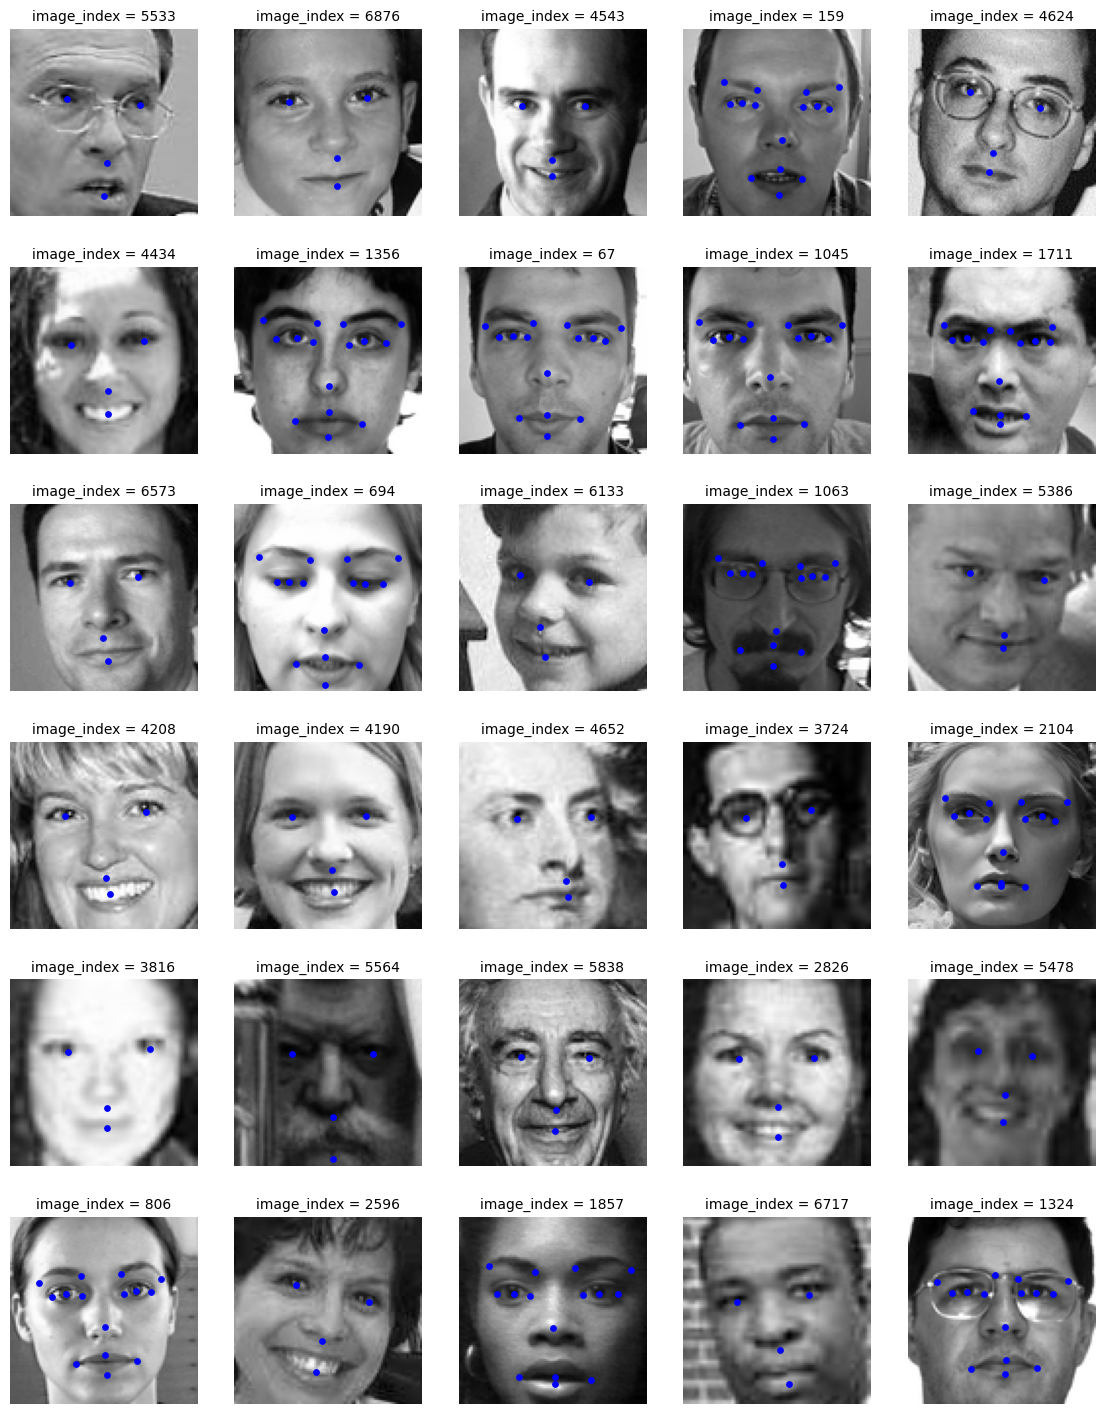

In [7]:
fig_row = 6
fig_col = 5

num_plot = fig_row * fig_col
random_indices_vector = np.random.choice(db_face_images.shape[2], num_plot, replace = False)
random_indices_mat = random_indices_vector.reshape(fig_row, fig_col)
plt.close('all')

fig, ax = plt.subplots(nrows = fig_row, ncols =fig_col, figsize = (14, 18))

for i in range(fig_row):
    for j in range(fig_col):
        curr_indice = random_indices_mat[i][j]
        curr_img = db_face_images[:,:,curr_indice]

        x_feature_cord = np.array(df_facial_keypoints.iloc[curr_indice, 0::2].tolist())
        y_feature_cord = np.array(df_facial_keypoints.iloc[curr_indice, 1::2].tolist())

        ax[i][j].imshow(curr_img, cmap = 'gray')
        ax[i][j].scatter(x_feature_cord,y_feature_cord,c='b',s=15)
        ax[i][j].set_axis_off()
        ax[i][j].set_title('image_index = %d' %(curr_indice),fontsize=10)


In [8]:
#Getting the modifed image database with 15 keypoints
db_face_images = db_face_images[:,:,indices]
db_face_images.shape

(96, 96, 2140)

In [9]:
#Reseting the index of keypoits as per indices
df_facial_keypoints = df_facial_keypoints.iloc[indices,:].reset_index(drop=True)
df_facial_keypoints.shape
df_facial_keypoints.head()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.033564          39.002274           30.227008   
1          64.332936          34.970077           29.949277   
2          65.057053          34.909642           30.903789   
3          65.225739          37.261774           32.023096   
4          66.725301          39.621261           32.244810   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.421678                59.582075                39.647423   
1           33.448715                58.856170                35.274349   
2           34.909642                59.412000                36.320968   
3           37.261774                60.003339                39.127179   
4           38.042032                58.565890                39.621261   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                73.130346                39.969997                 36.356571   
1                70.722723                36.187166                 36.034723   
2                70.984421                36.320968                 37.678105   
3                72.314713                38.380967                 37.618643   
4                72.515926                39.884466                 36.982380   

   right_eye_inner_corner_y  right_eye_outer_corner_x  \
0                 37.389402                 23.452872   
1                 34.361532                 24.472511   
2                 36.320968                 24.976421   
3                 38.754115                 25.307270   
4                 39.094852                 22.506110   

   right_eye_outer_corner_y  left_eyebrow_inner_end_x  \
0                 37.389402                 56.953263   
1                 33.144443                 53.987404   
2                 36.603221                 55.742526   
3                 38.007903                 56.433809   
4                 38.305237                 57.249571   

   left_eyebrow_inner_end_y  left_eyebrow_outer_end_x  \
0                 29.033648                 80.227128   
1                 28.275949                 78.634213   
2                 27.570947                 78.887368   
3                 30.929864                 77.910261   
4                 30.672177                 77.762945   

   left_eyebrow_outer_end_y  right_eyebrow_inner_end_x  \
0                 32.228138                  40.227609   
1                 30.405923                  42.728851   
2                 32.651621                  42.193895   
3                 31.665725                  41.671513   
4                 31.737247                  38.035436   

   right_eyebrow_inner_end_y  right_eyebrow_outer_end_x  \
0                  29.002322                  16.356379   
1                  26.146043                  16.865362   
2                  28.135453                  16.791158   
3                  31.049990                  20.458017   
4                  30.935382                  15.925870   

   right_eyebrow_outer_end_y  nose_tip_x  nose_tip_y  mouth_left_corner_x  \
0                  29.647471   44.420571   57.066803            61.195308   
1                  27.058860   48.206298   55.660936            56.421447   
2                  32.087116   47.557263   53.538947            60.822947   
3                  29.909343   51.885078   54.166539            65.598887   
4                  30.672177   43.299534   64.889521            60.671411   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            79.970165             28.614496             77.388992   
1            76.352000             35.122383             76.047660   
2            73.014316             33.726316             72.732000   
3            72.703722             37.245496             74.195478   
4            77.523239             31.191755             76.997301   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_botto

### Now we have our modified dataset and keypoints with all images having 15 keypoints

In [10]:
#Converting both dataset and dataframe into array for further modification

db_face_images = np.moveaxis(db_face_images, -1, 0)
db_face_images.shape

# Images are gray scale
db_images = np.asarray(db_face_images).reshape(db_face_images.shape[0],96,96,1)
print(db_images.shape)

df_keypoints = np.array(df_facial_keypoints)
print(df_keypoints.shape)


(2140, 96, 96, 1)
(2140, 30)


In [11]:
#Let's create a function to plot the image
def plot_sample(image, keypoint, axis, title):
    image = image.reshape(96,96)
    axis.imshow(image, cmap='gray')
    axis.scatter(keypoint[0::2], keypoint[1::2], marker='*', s=20)
    plt.title(title)

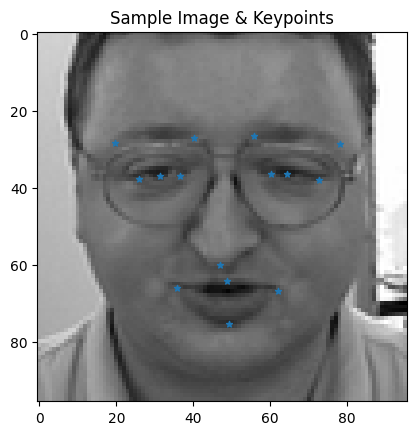

In [12]:
#Let's create a new label for images and keypoints
db_images_modify = db_images
df_keypoints_modify = df_keypoints
fig, axis = plt.subplots()
plot_sample(db_images[50], df_keypoints[50], axis, "Sample Image & Keypoints")

In [13]:
#Various Image Agumentation choices
sample = 50
horizontal_flip = True
rotation_augmentation = True
brightness_augmentation = True
shift_augmentation = True
random_noise_augmentation = True

## Horizontal Flipping

Shape of flipped_images: (2140, 96, 96, 1)
Shape of flipped_keypoints: (2140, 30)
Shape of images database after shifting: (4280, 96, 96, 1)
Shape of keypoints dataframe after shifting: (4280, 30)


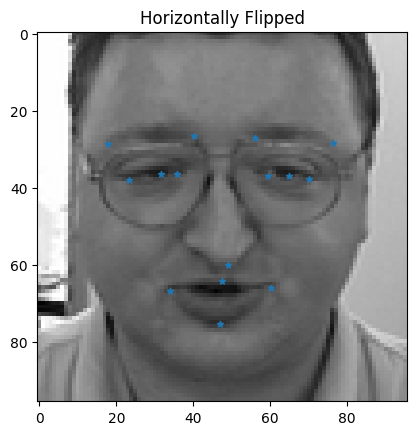

In [14]:
#Function for flipping of images horizontally
def flip(images, keypoints):
    flipped_keypoints = []
    flipped_images = np.flip(images, axis=2)   # Flip column-wise (axis=2)
    for idx, sample_keypoints in enumerate(keypoints):
        flipped_keypoints.append([96.-coor if idx%2==0 else coor for idx,coor in enumerate(sample_keypoints)])    # Subtract only X co-ordinates of keypoints from 96 for horizontal flipping
    return flipped_images, flipped_keypoints

if horizontal_flip:
    db_images_flipped, df_keypoints_flipped = flip(db_images, df_keypoints)
    print("Shape of flipped_images:",np.shape(db_images_flipped))
    print("Shape of flipped_keypoints:",np.shape(df_keypoints_flipped))

    #Adding flipped images and keypoints to my modified dataset and dataframe
    db_images_modify = np.concatenate((db_images_modify, db_images_flipped))
    df_keypoints_modify = np.concatenate((df_keypoints_modify, df_keypoints_flipped))
    fig, axis = plt.subplots()
    plot_sample(db_images_flipped[sample], df_keypoints_flipped[sample], axis, "Horizontally Flipped")


print("Shape of images database after shifting:",db_images_modify.shape)
print("Shape of keypoints dataframe after shifting:",df_keypoints_modify.shape)


## Translation/shifting on images(pixels) and keypoints

Shape of shifted_images: (6350, 96, 96, 1)
Shape of shifted_keypoints: (6350, 30)
Shape of images database after shifting: (10630, 96, 96, 1)
Shape of keypoints dataframe after shifting: (10630, 30)


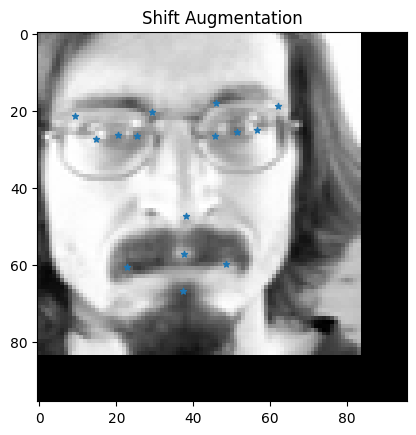

In [15]:
pixel_shift = [12]    # shift amount in pixels (includes shift from all 4 corners)

#Function fot translation
def shift(images, keypoints):
    shifted_images = []
    shifted_keypoints = []
    for shift in pixel_shift:    # Augmenting over several pixel shift values
        for (shift_x,shift_y) in [(-shift,-shift),(-shift,shift),(shift,-shift),(shift,shift)]:
            M = np.float32([[1,0,shift_x],[0,1,shift_y]])
            for image, keypoint in zip(images, keypoints):
                shifted_image = cv2.warpAffine(image, M, (96,96), flags=cv2.INTER_CUBIC)
                shifted_keypoint = np.array([(point+shift_x) if idx%2==0 else (point+shift_y) for idx, point in enumerate(keypoint)])
                if np.all(0.0<shifted_keypoint) and np.all(shifted_keypoint<96.0):
                    shifted_images.append(shifted_image.reshape(96,96,1))
                    shifted_keypoints.append(shifted_keypoint)
    shifted_keypoints = np.clip(shifted_keypoints,0.0,96.0)
    return shifted_images, shifted_keypoints

if shift_augmentation:
    db_images_shifted, df_keypoints_shifted = shift(db_images, df_keypoints)
    print(f"Shape of shifted_images:",np.shape(db_images_shifted))
    print(f"Shape of shifted_keypoints:",np.shape(df_keypoints_shifted))

    db_images_modify = np.concatenate((db_images_modify, db_images_shifted))
    df_keypoints_modify = np.concatenate((df_keypoints_modify, df_keypoints_shifted))
    fig, axis = plt.subplots()
    plot_sample(db_images_shifted[sample], df_keypoints_shifted[sample], axis, "Shift Augmentation")

print("Shape of images database after shifting:",np.shape(db_images_modify))
print("Shape of keypoints dataframe after shifting:",np.shape(df_keypoints_modify))

## Rotation on images and keypoints

Augmenting for angles (in degrees): 
12  -12  
Shape of rotated_images: (4280, 96, 96, 1)
Shape of rotated_keypoints:
 (4280, 30)
Shape of images database after shifting: (14910, 96, 96, 1)
Shape of keypoints dataframe after shifting: (14910, 30)


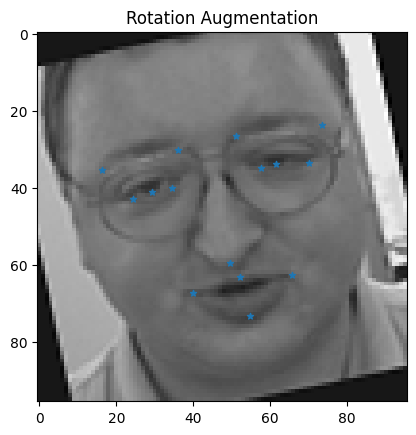

In [16]:
from math import sin, cos, pi


rotation_angles = [12]    # Rotation angle in degrees (includes both clockwise & anti-clockwise rotations)

#Function for Rotation of the Images
def rotate(images, keypoints):
    rotated_images = []
    rotated_keypoints = []
    print("Augmenting for angles (in degrees): ")

    for angle in rotation_angles:    # Rotation augmentation for a list of angle values
        for angle in [angle,-angle]:
            print(f'{angle}', end='  ')
            M = cv2.getRotationMatrix2D((48,48), angle, 1.0)
            angle_rad = -angle*pi/180.     # Obtain angle in radians from angle in degrees (notice negative sign for change in clockwise vs anti-clockwise directions from conventional rotation to cv2's image rotation)

            # For train_images
            for image in images:
                rotated_image = cv2.warpAffine(image, M, (96,96), flags=cv2.INTER_CUBIC)
                rotated_images.append(rotated_image)

            # For train_keypoints
            for keypoint in keypoints:
                rotated_keypoint = keypoint - 48.    # Subtract the middle value of the image dimension
                for idx in range(0,len(rotated_keypoint),2):
                    # https://in.mathworks.com/matlabcentral/answers/93554-how-can-i-rotate-a-set-of-points-in-a-plane-by-a-certain-angle-about-an-arbitrary-point
                    rotated_keypoint[idx] = rotated_keypoint[idx]*cos(angle_rad)-rotated_keypoint[idx+1]*sin(angle_rad)
                    rotated_keypoint[idx+1] = rotated_keypoint[idx]*sin(angle_rad)+rotated_keypoint[idx+1]*cos(angle_rad)
                rotated_keypoint += 48.   # Add the earlier subtracted value
                rotated_keypoints.append(rotated_keypoint)

    return np.reshape(rotated_images,(-1,96,96,1)), rotated_keypoints

#For more details on the transformation of the images below is the link.
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

if rotation_augmentation:
    db_images_rotated, df_keypoints_rotated = rotate(db_images, df_keypoints)
    print("\nShape of rotated_images:",np.shape(db_images_rotated))
    print("Shape of rotated_keypoints:\n",np.shape(df_keypoints_rotated))

    #Concatenating the train images with rotated image & train keypoints with rotated train points
    db_images_modify = np.concatenate((db_images_modify, db_images_rotated))
    df_keypoints_modify = np.concatenate((df_keypoints_modify, df_keypoints_rotated))
    fig, axis = plt.subplots()
    plot_sample(db_images_rotated[sample], df_keypoints_rotated[sample], axis, "Rotation Augmentation")

print("Shape of images database after shifting:",np.shape(db_images_modify))
print("Shape of keypoints dataframe after shifting:",np.shape(df_keypoints_modify))

## Adding Noise to image

Shape of noisy_train_images: (2140, 96, 96, 1)
Shape of images database after shifting: (17050, 96, 96, 1)
Shape of keypoints dataframe after shifting: (17050, 30)


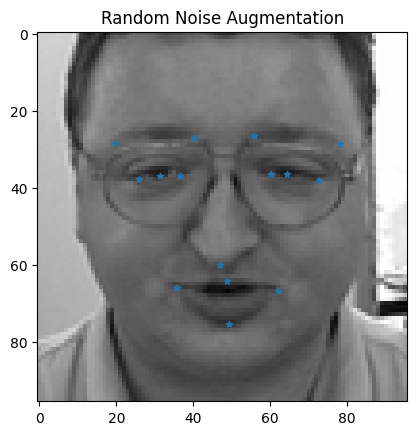

In [17]:
#Writing a function to add noise
def add_noise(images):
    noisy_images = []
    for image in images:
        noisy_image = cv2.add(image, 0.009*np.random.randn(96,96,1))    # Adding random normal noise to the input image & clip the resulting noisy image between [-1,1]
        noisy_images.append(noisy_image.reshape(96,96,1))
    return noisy_images

if random_noise_augmentation:
    db_images_noisy = add_noise(db_images)
    print("Shape of noisy_train_images:",np.shape(db_images_noisy))

    db_images_modify = np.concatenate((db_images_modify, db_images_noisy))
    df_keypoints_modify = np.concatenate((df_keypoints_modify, df_keypoints))
    fig, axis = plt.subplots()
    plot_sample(db_images_noisy[sample], df_keypoints[sample], axis, "Random Noise Augmentation")

print("Shape of images database after shifting:",np.shape(db_images_modify))
print("Shape of keypoints dataframe after shifting:",np.shape(df_keypoints_modify))

## Visualizing our final dataset with all augmentation

Shape of final train_images: (17050, 96, 96, 1)
Shape of final train_keypoints: (17050, 30)
Horizontal Flip Augmentation: 


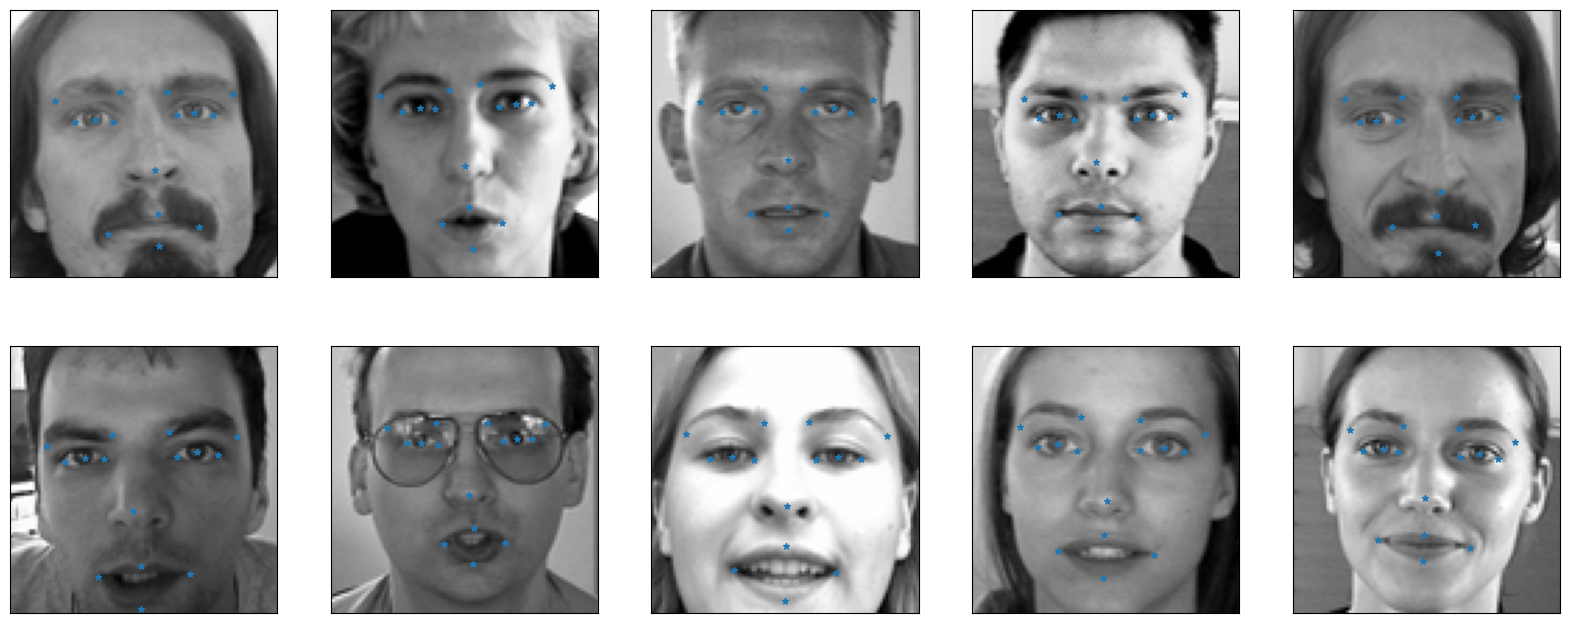

Shift Augmentation: 


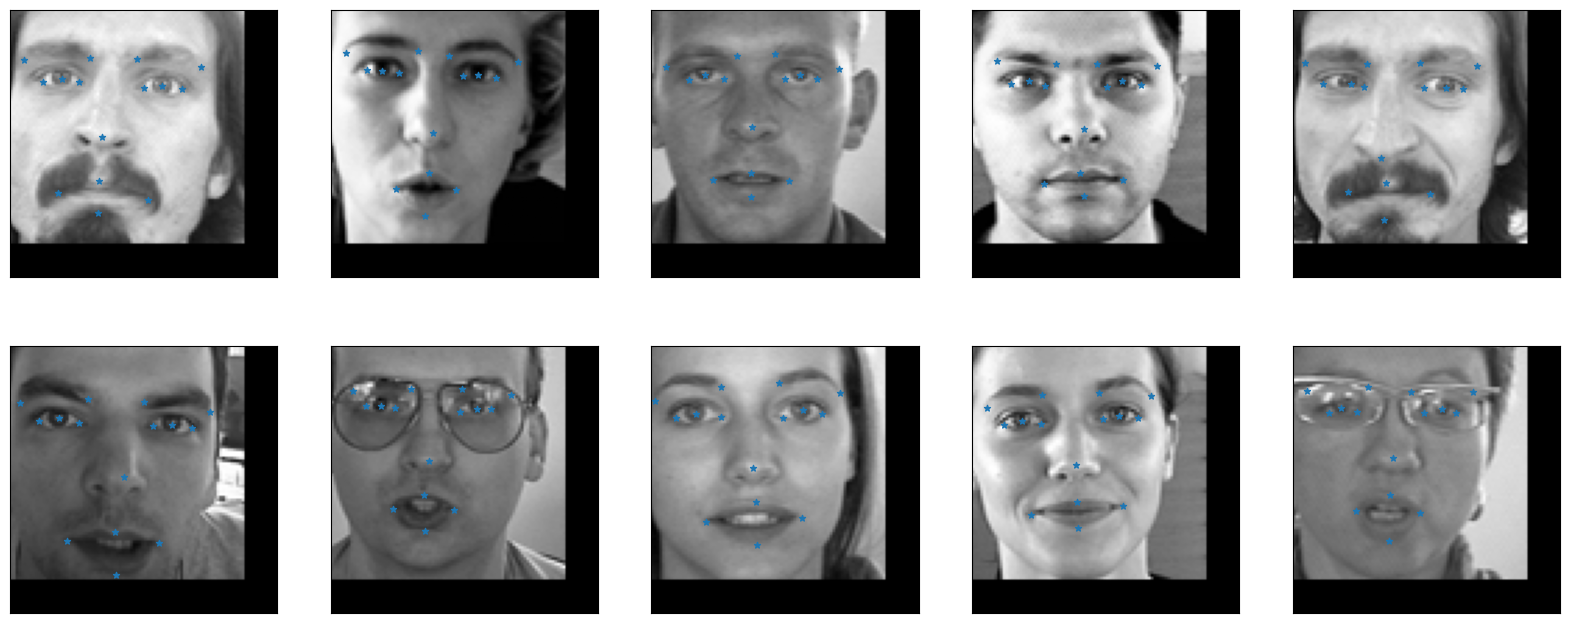

Rotation Augmentation: 


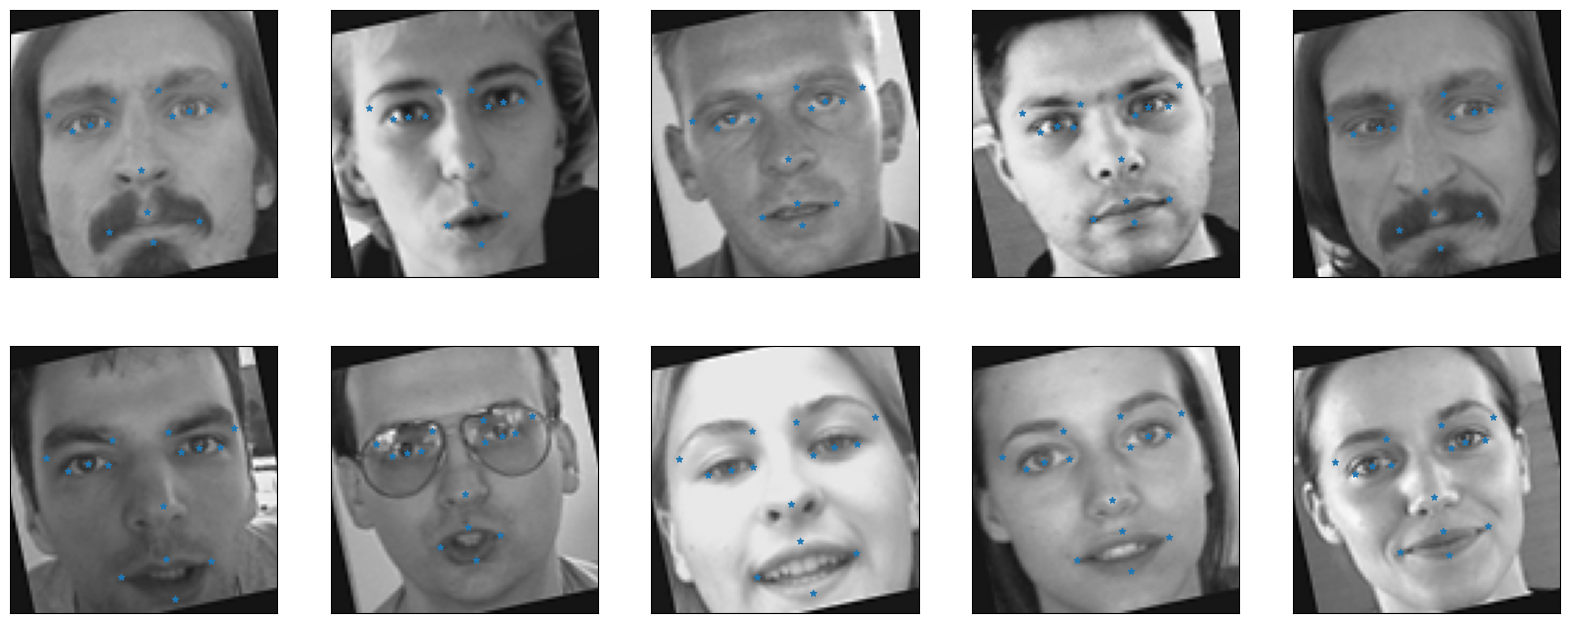

Random Noise Augmentation: 


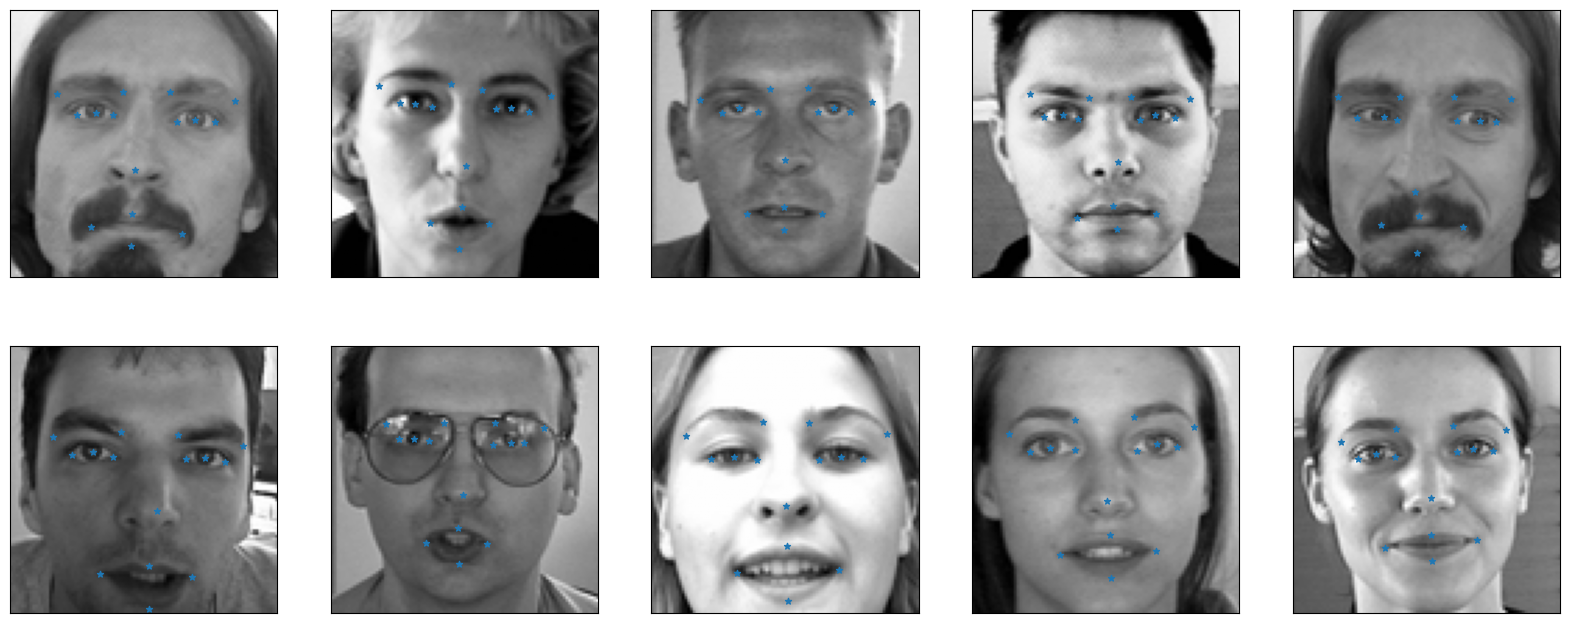

In [18]:
print("Shape of final train_images: {}".format(np.shape(db_images_modify)))
print("Shape of final train_keypoints: {}".format(np.shape(df_keypoints_modify)))

if horizontal_flip:
    print("Horizontal Flip Augmentation: ")
    fig = plt.figure(figsize=(20,8))
    for i in range(10):
        axis = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
        plot_sample(db_images_flipped[i], df_keypoints_flipped[i], axis, "")
    plt.show()

if shift_augmentation:
    print("Shift Augmentation: ")
    fig = plt.figure(figsize=(20,8))
    for i in range(10):
        axis = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
        plot_sample(db_images_shifted[i], df_keypoints_shifted[i], axis, "")
    plt.show()

if rotation_augmentation:
    print("Rotation Augmentation: ")
    fig = plt.figure(figsize=(20,8))
    for i in range(10):
        axis = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
        plot_sample(db_images_rotated[i], df_keypoints_rotated[i], axis, "")
    plt.show()

if random_noise_augmentation:
    print("Random Noise Augmentation: ")
    fig = plt.figure(figsize=(20,8))
    for i in range(10):
        axis = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
        plot_sample(db_images_noisy[i], df_keypoints[i], axis, "")
    plt.show()

In [19]:
X = np.array(db_images_modify)
print(X.shape)

(17050, 96, 96, 1)


In [20]:
y = np.array(df_keypoints_modify)
print(y.shape)

(17050, 30)


In [21]:
#checking the type of both X and y dataset
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.20)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(13640, 96, 96, 1) (3410, 96, 96, 1) (13640, 30) (3410, 30)


In [23]:
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

#Normalize the input image
X_train = X_train / 255
X_test = X_test / 255


In [24]:
from keras.models import Sequential
from keras.layers import ReLU, Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Dropout, Activation
from keras.models import Model

model = Sequential()

model.add(Conv2D(32, (3, 3),use_bias=False, input_shape = (96, 96, 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3), use_bias=False))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3), use_bias=False))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3), use_bias=False))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(30))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 94, 94, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 94, 94, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 94, 94, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 45, 45, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 45, 45, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       294,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         7,710 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,445,822 (5.52 MB)

 Trainable params: 1,444,862 (5.51 MB)

 Non-trainable params: 960 (3.75 KB)

In [25]:
from keras import optimizers

opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="mean_squared_error",optimizer= opt, metrics = ['accuracy'])

In [26]:
model.fit(x = X_train, y = y_train, epochs = 100, batch_size = 128)

Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - accuracy: 0.3287 - loss: 447.2711
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.5324 - loss: 78.5933
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.5784 - loss: 52.0161
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.6119 - loss: 39.5929
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.6401 - loss: 31.5895
Epoch 6/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6472 - loss: 26.6452
Epoch 7/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.6635 - loss: 23.0792
Epoch 8/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.6789 - loss: 20.1061
Epoch 9/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6957 - loss: 18.3791
Epoch 10/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7104 - loss: 18.3629
Epoch 11/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7126 - loss: 17.2772
Epoch 12/100
107/

In [27]:
import os
model.save('model_facial_landmark.hdf5', overwrite = True)

In [28]:
#Evaluating and predicting the test dataset
predicted = model.evaluate(x = X_test, y = y_test)

print("Loss = " + str(predicted[0]))
print("Test Accuracy = " + str(predicted[1]))

y_test_pred = model.predict(X_test)

107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7783 - loss: 14.7014
Loss = 14.595754623413086
Test Accuracy = 0.7832844853401184
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


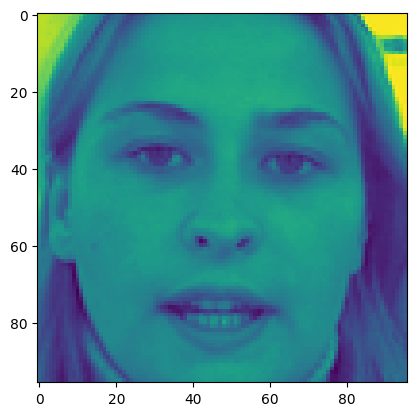

In [29]:
#Showing test images
from keras.preprocessing.image import img_to_array, array_to_img
plt.imshow(array_to_img(X_test[0]))

In [30]:
y_test_pred[0][0]

np.float32(62.94633)

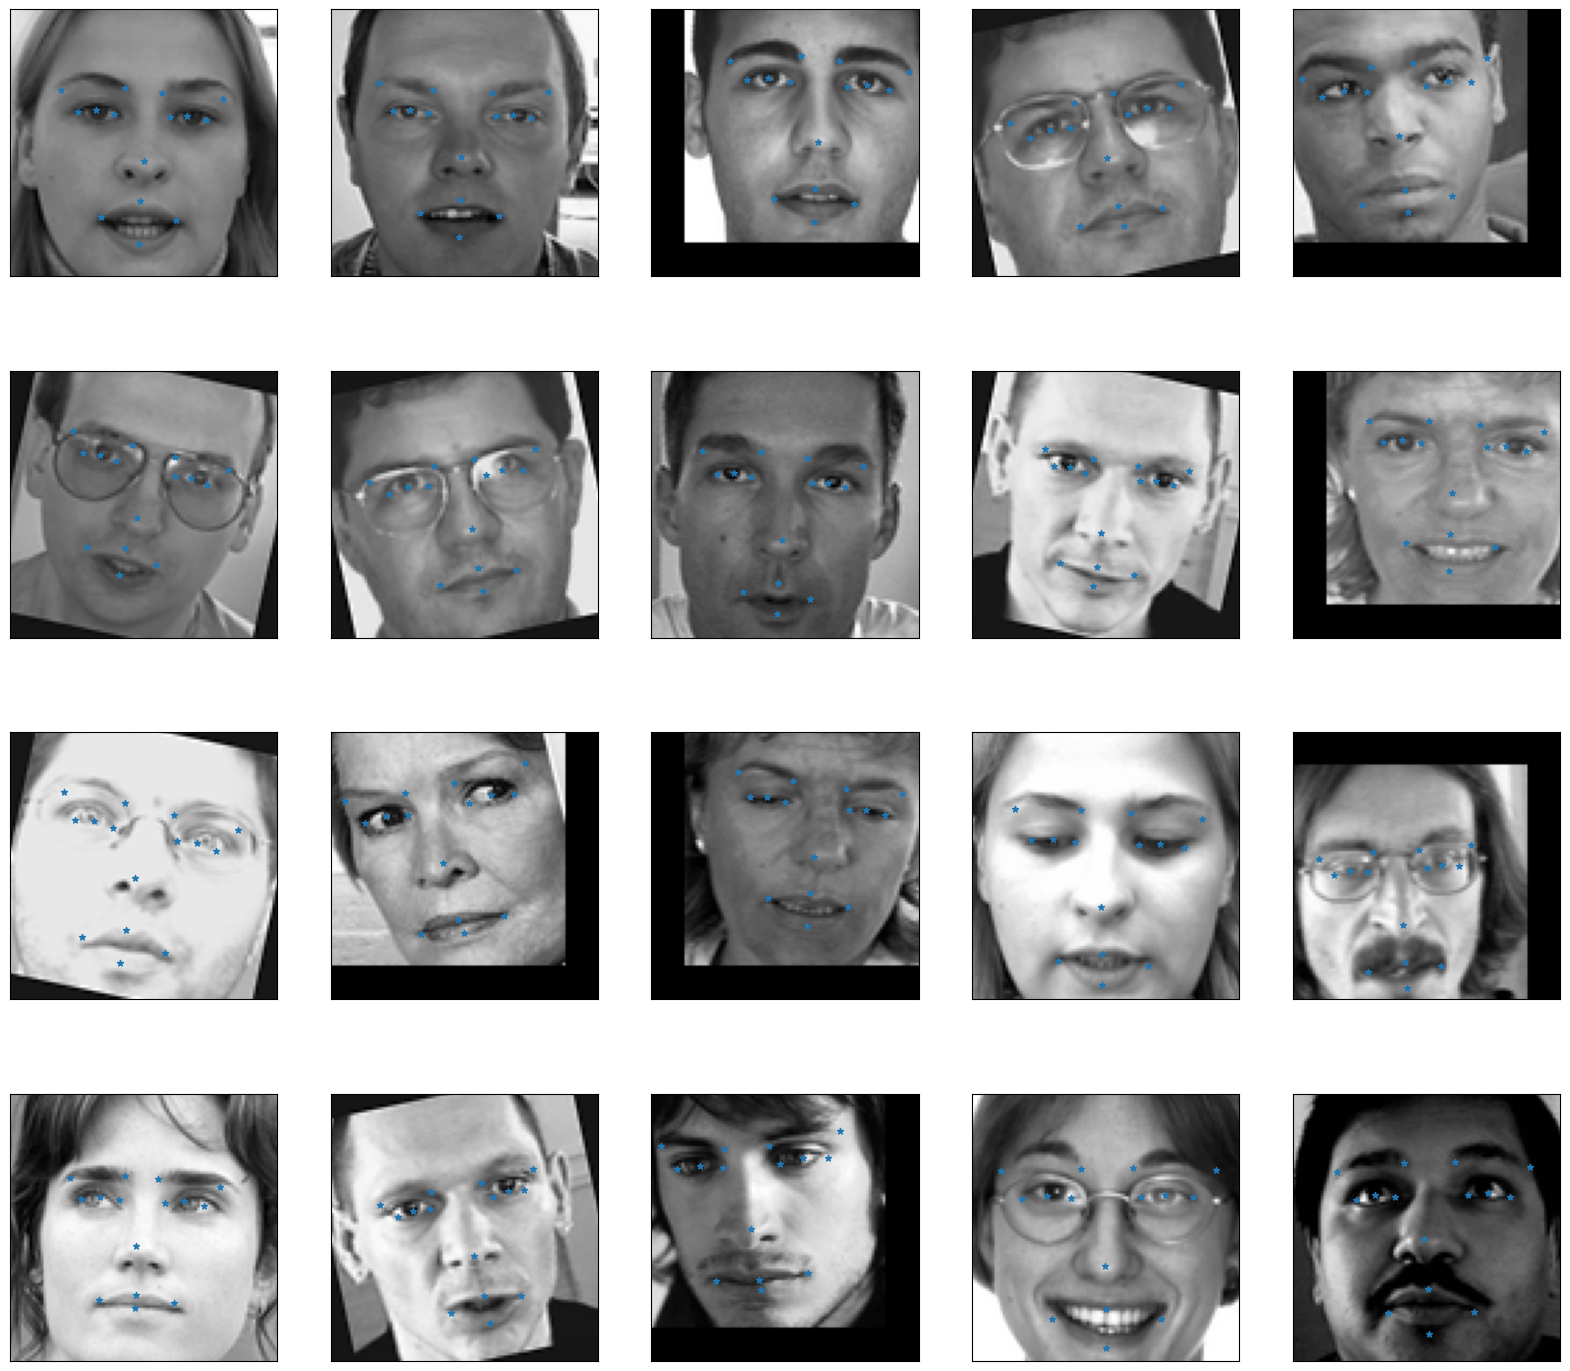

In [31]:
fig = plt.figure(figsize=(20,18))
for i in range(20):
    axis = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])
    plot_sample(X_test[i], y_test_pred[i], axis, "")
plt.show()